In [1]:
# includes core parts of numpy, matplotlib
import matplotlib.pyplot as plt
import numpy as np

# include scipy's signal processing functions
import scipy.signal as signal

In [7]:
# sampling fequency
fs=4e6 # 4MHz
data_fn =  "KLX-V8(4FSK)_IQ-Data_0510.bin"

nfft = 512 # window size
noverlap = 256 # window overlap

In [5]:
# Read in raw I/Q interleaved 32-bit float samples
data = np.fromfile(data_fn, dtype="float32")

# Turn the interleaved I and Q samples into complex values
data = data[0::2] + 1j*data[1::2]

print(f"length: {len(data)} points, {len(data)/fs} seconds")

length: 25755759 points, 6.43893975 seconds


Text(0, 0.5, 'Frequency')

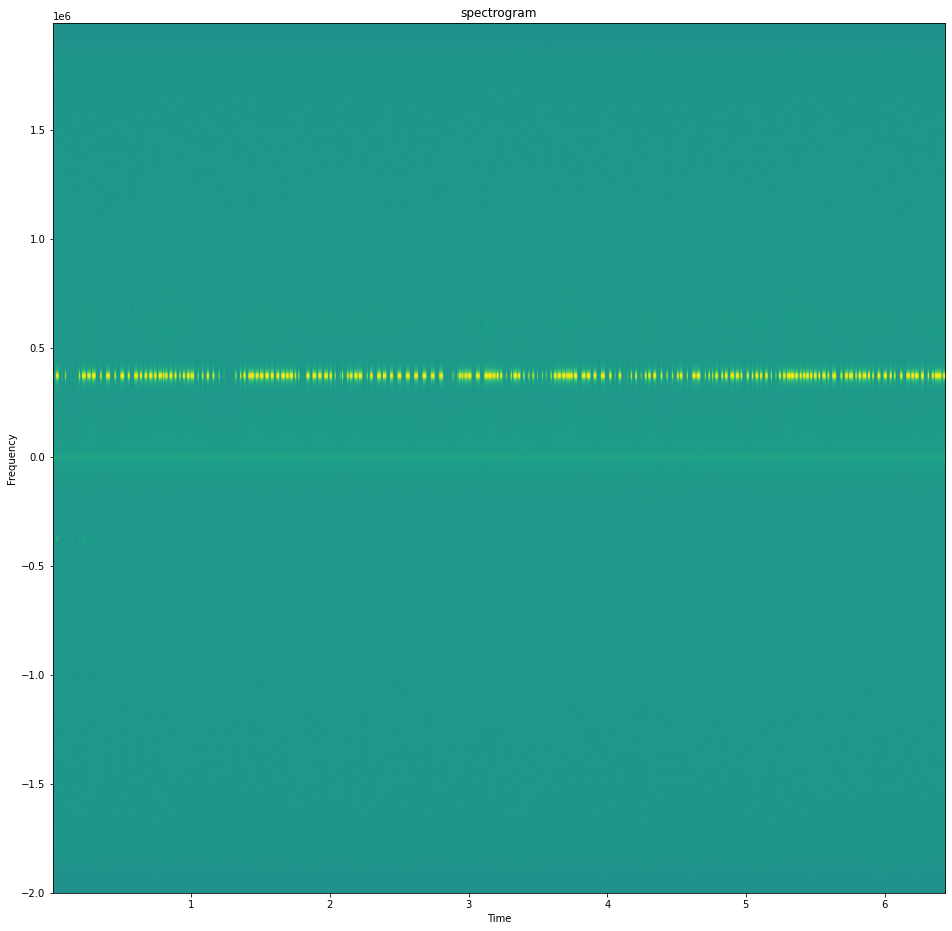

In [8]:
# Plot the spectogram using matplot
# matploblib中mode设置为magnitude和psd没有区别，不知道为什么？
# 与scipy.signal中的结果相比，应该是magnitude
plt.figure(figsize=(16, 16))
plt.specgram(data, NFFT=nfft, noverlap=noverlap, Fs=fs, mode = 'magnitude')
plt.title("spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'PSD of dynamic')

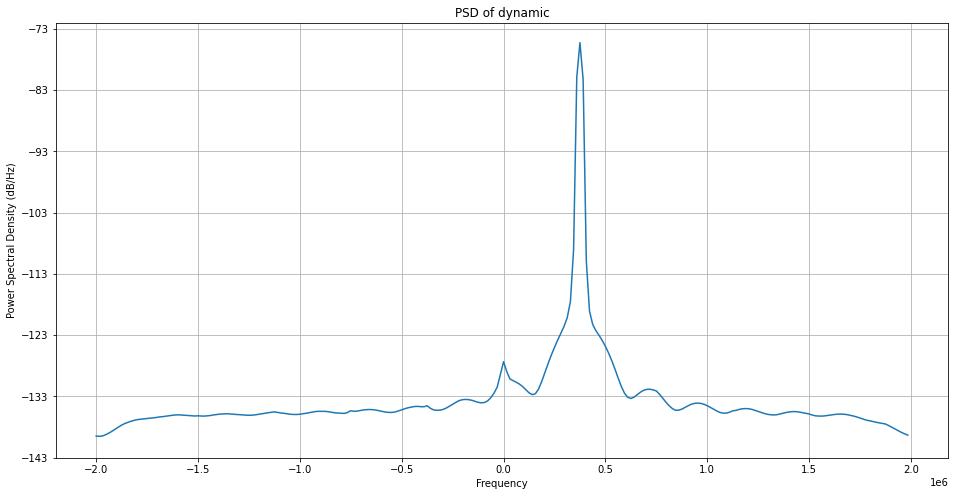

In [9]:
# Plot the psd using matplot
plt.figure(figsize=(16, 8))
plt.psd(data, NFFT=256, Fs=fs)
plt.title("PSD of dynamic")

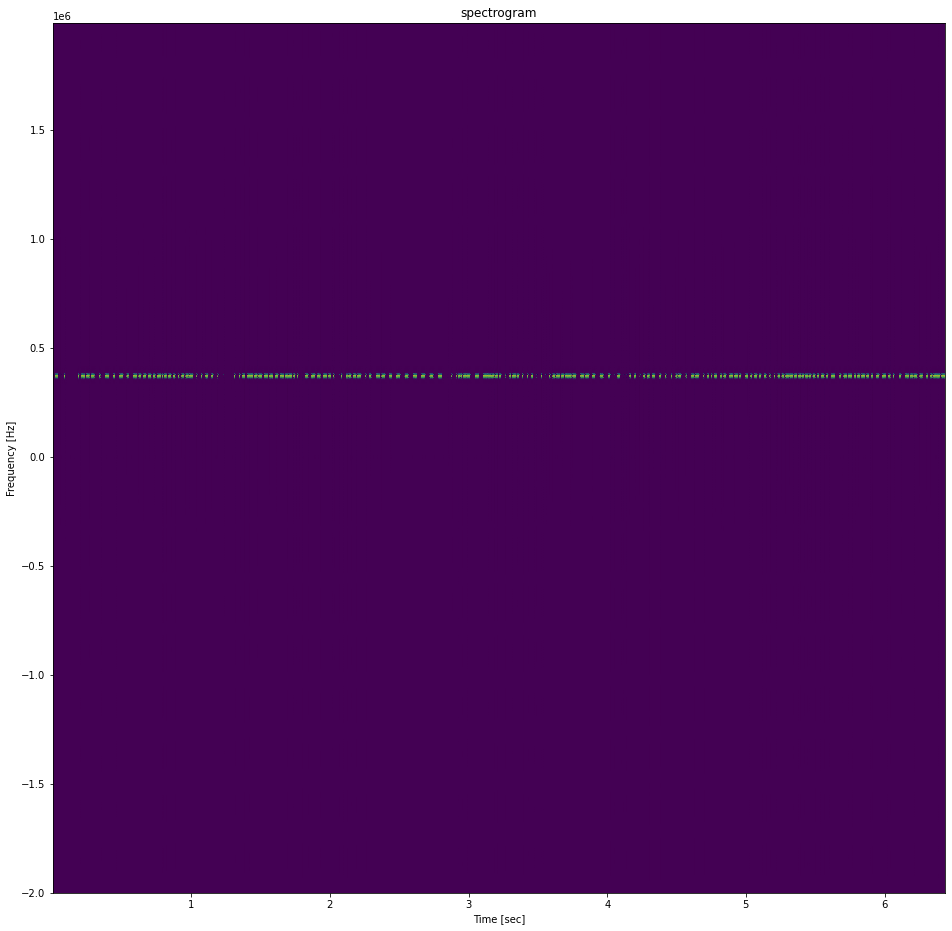

In [10]:
from scipy.fft import fftshift

# plot the spectrogram using scipy.signal
# 注意要把mode设置为magnitude

# calculate spectrogram using scipy.signal.spectrogram
# note: default detrend = constant, the mean of data is subtracted.
# however in matplotlib, default detrend = None, no detrend
# so here we keep the default of matplotlib
f1, t1, spectrogram = signal.spectrogram(data, fs, window='hann', nperseg=nfft, noverlap=noverlap, detrend = False, mode = 'magnitude', return_onesided = False)

plt.figure(figsize=(16, 16))
plt.pcolormesh(t1, fftshift(f1), fftshift(spectrogram, axes=0), shading='gouraud')
plt.title("spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

mean centroids: 170882.249871019


No handles with labels found to put in legend.
No handles with labels found to put in legend.


mean spreads: 721065.430012475


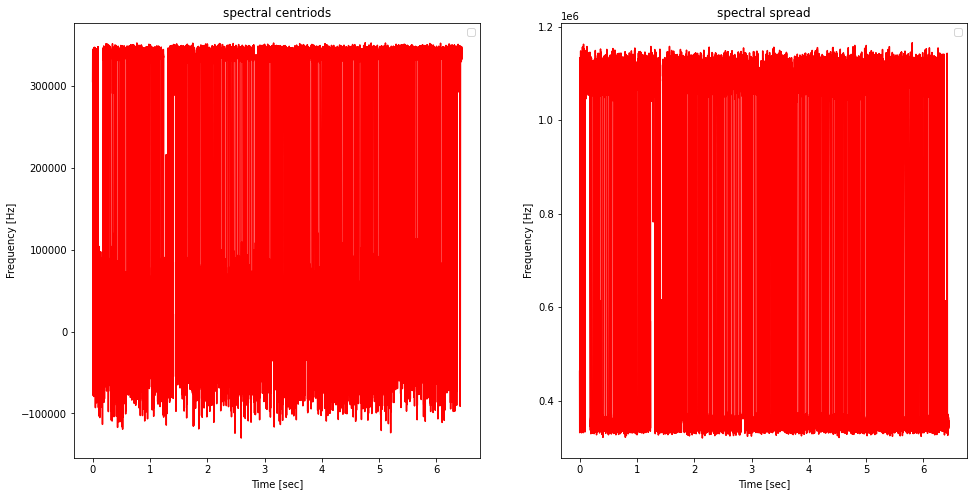

In [11]:
# 计算频谱质心和带宽
centriods = get_centroid(spectrogram, f1)
print(f"mean centroids: {np.mean(centriods)}")

# 计算频谱带宽
spread = get_spread(spectrogram, f1, centriods)
print(f"mean spreads: {np.mean(spread)}")

plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.plot(t1, centriods, color = 'r')
plt.title("spectral centriods")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.legend()

plt.subplot(122)
plt.plot(t1, spread, color = 'r')
plt.title("spectral spread")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.legend()

plt.show()

In [31]:
data.shape

(25333308,)

In [83]:
win = int(0.02 * fs)
n = int(data.shape[0] // win)
print(f'frame size: {win}, frame count: {n}')

frame size: 80000, frame count: 316


In [84]:
data = data[: n * win]

In [85]:
data2 =data.reshape(-1, win)

In [86]:
data2.shape

(316, 80000)

In [95]:
norm = np.linalg.norm(data2, axis = 1)

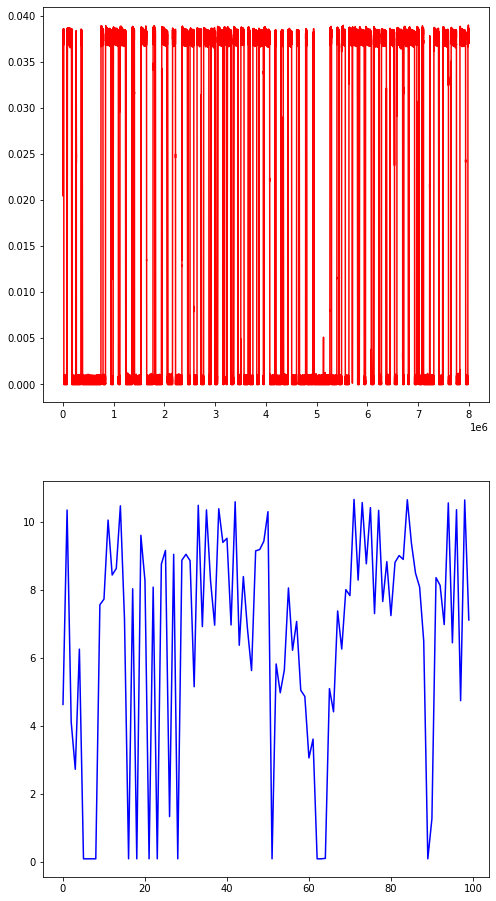

In [96]:
count = 100
plt.figure(figsize=(8, 16))
plt.subplot(211)
plt.plot(np.abs(data[: count * win]), color = 'r')
plt.subplot(212)
plt.plot(norm[:count], color = 'b')
plt.show()

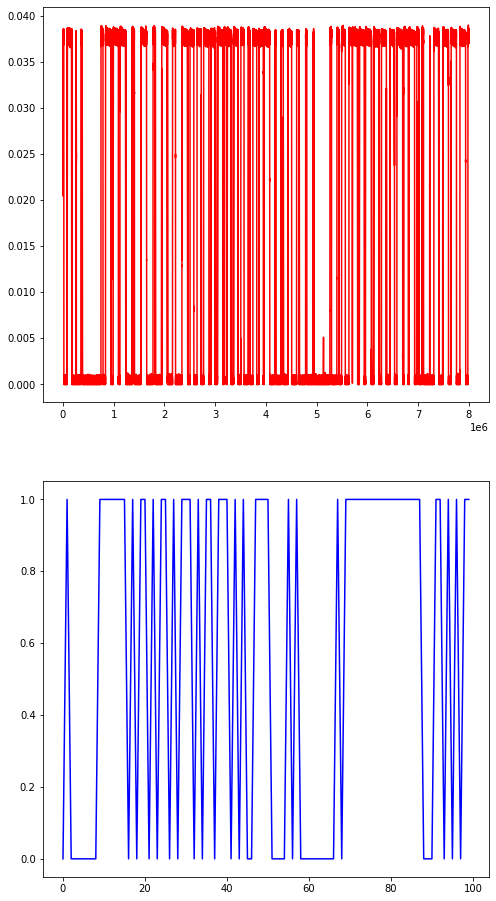

In [101]:
mask = norm > 7

count = 100
plt.figure(figsize=(8, 16))
plt.subplot(211)
plt.plot(np.abs(data[: count * win]), color = 'r')
plt.subplot(212)
plt.plot(mask[:count], color = 'b')
plt.show()

In [102]:
data3 = data2 * mask.reshape(-1, 1)
data4 = data3.reshape(-1)
print(f'{data4.shape} == {data.shape}')

(25280000,) == (25280000,)


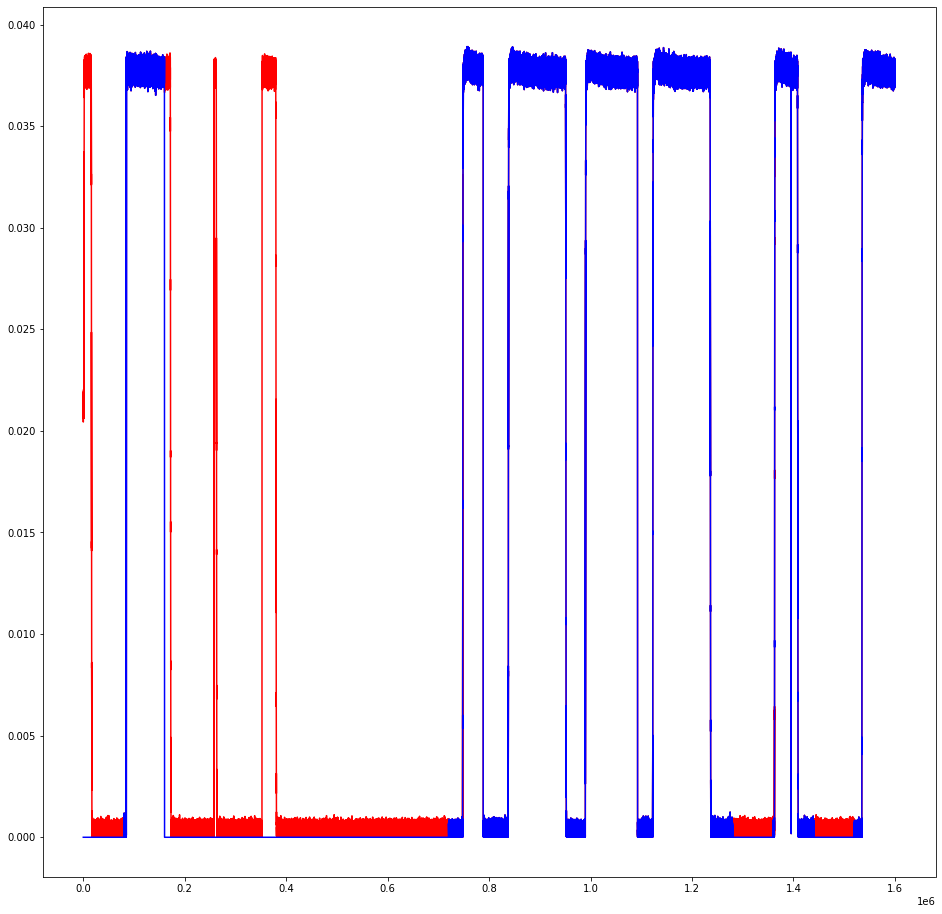

In [103]:
count = 20
plt.figure(figsize=(16, 16))
plt.plot(np.abs(data[: count * win]), color = 'r')
plt.plot(np.abs(data4[: count * win]), color = 'b')
plt.show()